# test_d23b.ipynb
Test the functions contained in d23b.py, often using their default parameters.

Author: Benjamin S. Grandey, 2023–2024

In [1]:
import datetime
import d23b
import matplotlib.pyplot as plt
import pyvinecopulib as pv

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

## Watermark

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit


## Data

### AR6 samples

In [4]:
%%time
samples_da = d23b.read_ar6_samples()
samples_da

CPU times: user 133 ms, sys: 25.3 ms, total: 159 ms
Wall time: 162 ms


<xarray.DataArray 'sea_level_change' (samples: 20000)>
array([ 0.033,  0.056,  0.021, ..., -0.005, -0.018, -0.005])
Coordinates:
    years    int32 2100
  * samples  (samples) int64 0 1 2 3 4 5 ... 19994 19995 19996 19997 19998 19999
Attributes:
    units:    m

### Antarctic ISM ensembles

In [5]:
%%time
ism_df = d23b.read_ism_ensemble_data()
ism_df

CPU times: user 10.4 s, sys: 1.13 s, total: 11.5 s
Wall time: 11.7 s


,WAIS,EAIS,Group,Notes,GrIS
0,-0.029648,-0.023720,P21,B1_AWI_PISM1,0.0
1,0.022744,0.010322,P21,B1_NCAR_CISM,0.0
2,0.007252,-0.020039,P21,B3_AWI_PISM1,0.0
3,0.078800,0.027450,P21,B3_NCAR_CISM,0.0
4,0.013104,-0.043617,P21,B4_AWI_PISM1,0.0
5,0.034448,0.001055,P21,B4_NCAR_CISM,0.0
6,-0.031954,-0.023385,P21,B5_AWI_PISM1,0.0
7,0.047175,0.024530,P21,B5_NCAR_CISM,0.0
8,-0.022967,-0.019902,P21,B6_AWI_PISM1,0.0
9,-0.015849,-0.017969,P21,B6_PIK_SICOPOLIS1,0.0


### FACTS data (gauge info, GRD)

In [6]:
%%time
gauge_info = d23b.read_gauge_info()
gauge_info

CPU times: user 25.8 ms, sys: 4.78 ms, total: 30.6 ms
Wall time: 29.8 ms


{'gauge_name': 'TANJONG_PAGAR', 'gauge_id': 1746, 'lat': 1.27, 'lon': 103.85}

In [7]:
%%time
gauge_grd = d23b.read_gauge_grd()
gauge_grd

CPU times: user 173 ms, sys: 25 ms, total: 198 ms
Wall time: 203 ms


{'gauge_name': 'TANJONG_PAGAR',
 'gauge_id': 1746,
 'lat': 1.27,
 'lon': 103.85,
 'lat_grd': 1.2280701398849487,
 'lon_grd': 103.85964965820312,
 'EAIS': 1.1081630364060402,
 'WAIS': 1.142452354542911,
 'GIS': 1.1161844013258815,
 'GrIS': 1.1161844013258815}

In [8]:
%%time
grd_df = d23b.get_grd_df()
grd_df.round(2)

CPU times: user 489 ms, sys: 56.9 ms, total: 545 ms
Wall time: 558 ms


,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


## Methods

### Quantile function containing samples

In [9]:
%%time
qf_da = d23b.get_component_qf()
qf_da

CPU times: user 89.2 ms, sys: 11.3 ms, total: 100 ms
Wall time: 100 ms


<xarray.DataArray 'sea_level_change' (p: 20000)>
array([-0.114, -0.113, -0.113, ...,  0.221,  0.222,  0.222])
Coordinates:
    years    int32 2100
  * p        (p) float64 0.0 5e-05 0.0001 0.00015 ... 0.9998 0.9999 0.9999 1.0
Attributes:
    units:    m

### Modelling marginal distributions using fusion

CPU times: user 22.1 ms, sys: 3.97 ms, total: 26.1 ms
Wall time: 26 ms


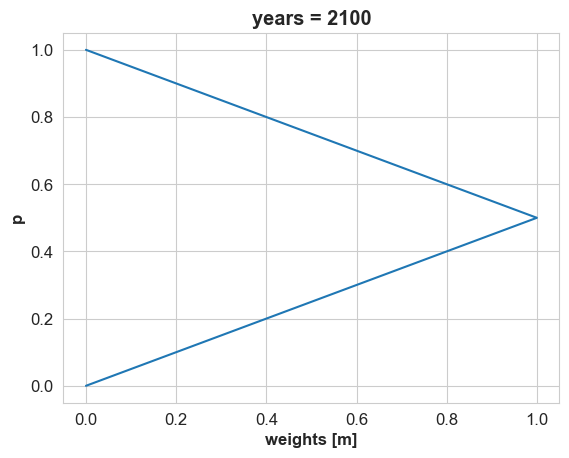

In [10]:
%%time
w_da = d23b.get_fusion_weights()
w_da.plot(y='p')

CPU times: user 211 ms, sys: 21.5 ms, total: 232 ms
Wall time: 235 ms


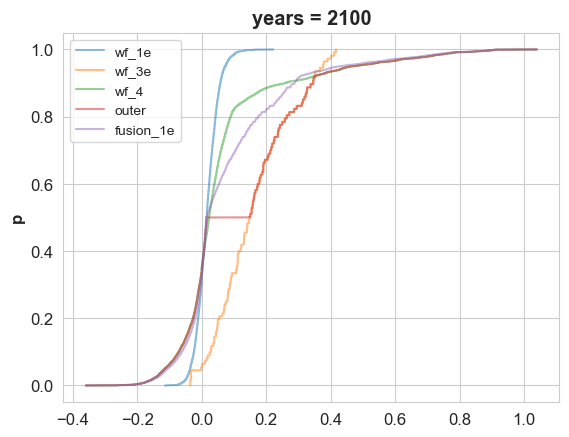

In [11]:
%%time
for workflow in ['wf_1e', 'wf_3e', 'wf_4', 'outer', 'fusion_1e']:
    qf_da = d23b.get_component_qf(workflow=workflow)
    qf_da.plot(y='p', label=workflow, alpha=0.5)
plt.legend()

### Quantifying dependence with bivariate copulas

In [12]:
%%time
bicop = d23b.quantify_bivariate_dependence()
bicop

read_ar6_samples(wf_1e, WAIS, ssp585, 2100): including PEN in WAIS
CPU times: user 324 ms, sys: 19.6 ms, total: 344 ms
Wall time: 347 ms


<pyvinecopulib.Bicop>
Gumbel 90°, parameters = 1.027

### Quantify trivariate dependence using a vine copula

In [13]:
%%time
for cop_workflow in ['wf_1e', 'wf_4', 'wf_3e', 'P21+L23', '1', '0', '10', '01',
                     (pv.BicopFamily.gaussian, 0.3), (pv.BicopFamily.clayton, 0.5), (pv.BicopFamily.joe, 0.7)]:
    tricop = d23b.quantify_trivariate_dependence(cop_workflow=cop_workflow)
    print(cop_workflow)
    print(tricop)
    print(tricop.taus)
    print('')

wf_1e
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Gumbel 90°, parameters = 1.027
2,3 <-> Clayton 180°, parameters = 0.0239618
** Tree: 1
1,3 | 2 <-> Clayton, parameters = 0.0345533

[[-0.0262897970306363, 0.011839061026383423], [0.01698323806175385]]
wf_4
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Joe, parameters = 1.96603
2,3 <-> Frank, parameters = 0.366098
** Tree: 1
1,3 | 2 <-> Clayton 270°, parameters = 0.0943228

[[0.3474489417743255, 0.040623106417807975], [-0.04503738260292951]]
wf_3e
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Frank, parameters = 22.0364
2,3 <-> Independence
** Tree: 1
1,3 | 2 <-> Independence

[[0.8320320015084047, 0.0], [0.0]]
P21+L23
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Joe, parameters = 3.26222
2,3 <-> Independence
** Tree: 1
1,3 | 2 <-> Independence

[[0.5475136442184771, 0.0], [0.0]]

1
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Gaussian, parameters = 1
2,3 <-> Gaussian, parameters = 1

[[1.0, 1.0]]

0
<pyvinecopulib.Vinecop>
** Tree: 0
1,2 <-> Indep

### Sample a vine copula

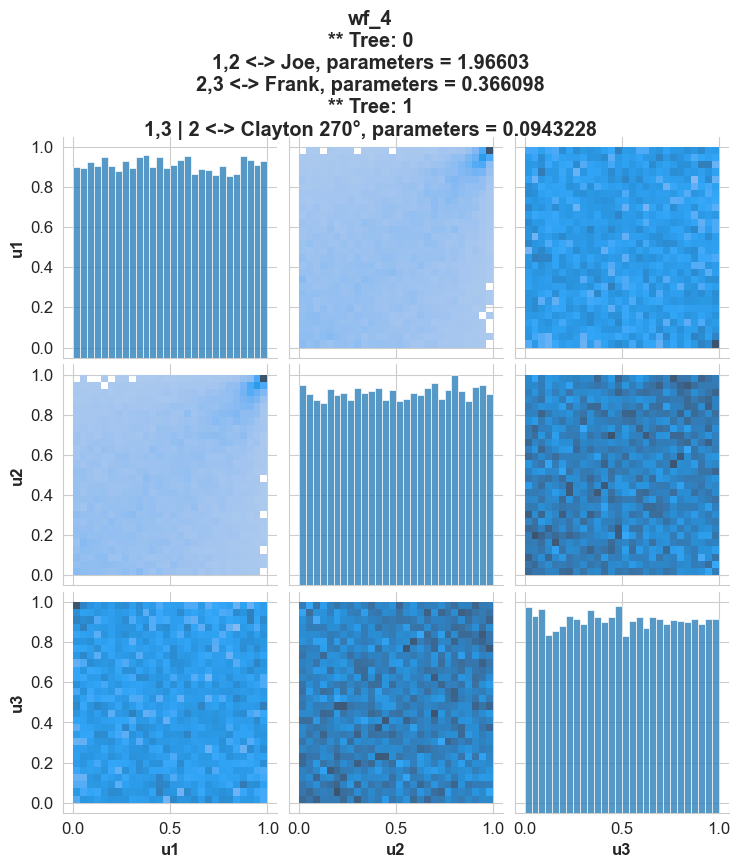

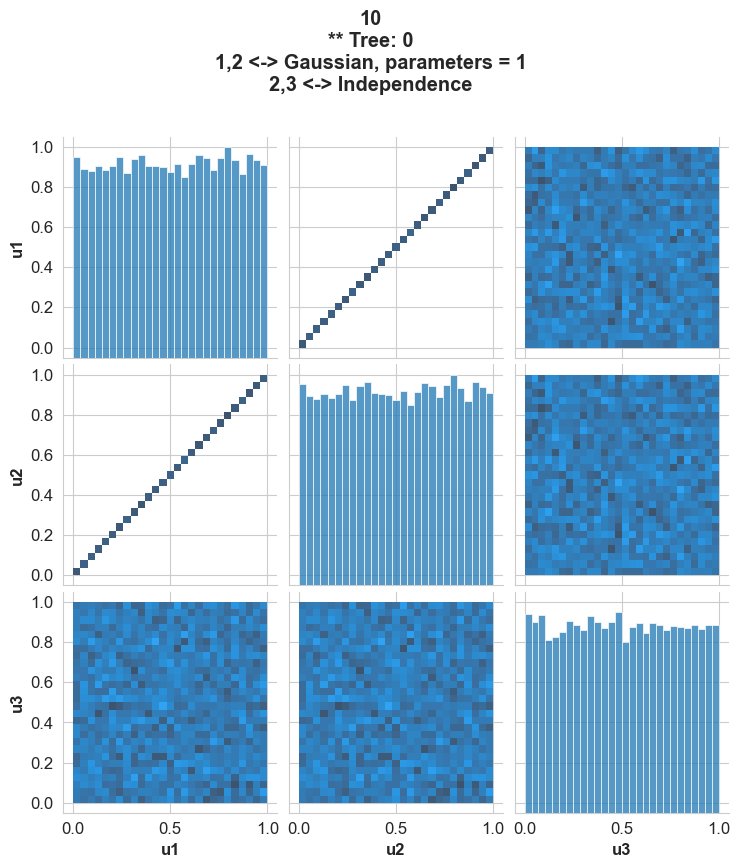

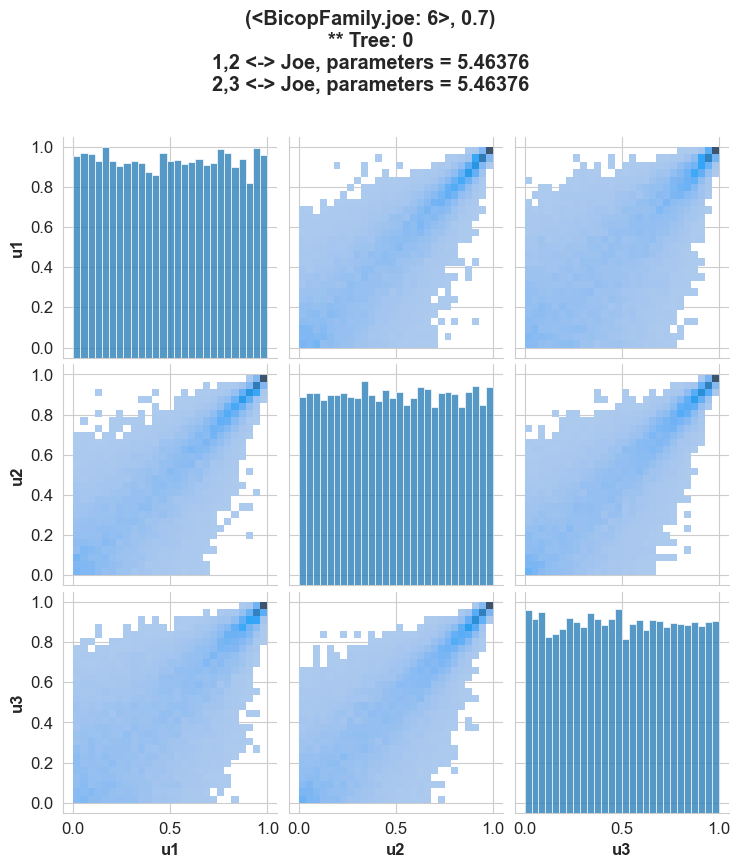

CPU times: user 2.97 s, sys: 38.3 ms, total: 3.01 s
Wall time: 3.01 s


In [14]:
%%time
for cop_workflow in ['wf_4', '10', (pv.BicopFamily.joe, 0.7)]:
    u_n3 = d23b.sample_trivariate_copula(cop_workflow=cop_workflow, plot=True)

### Sampling the total ice-sheet contribution

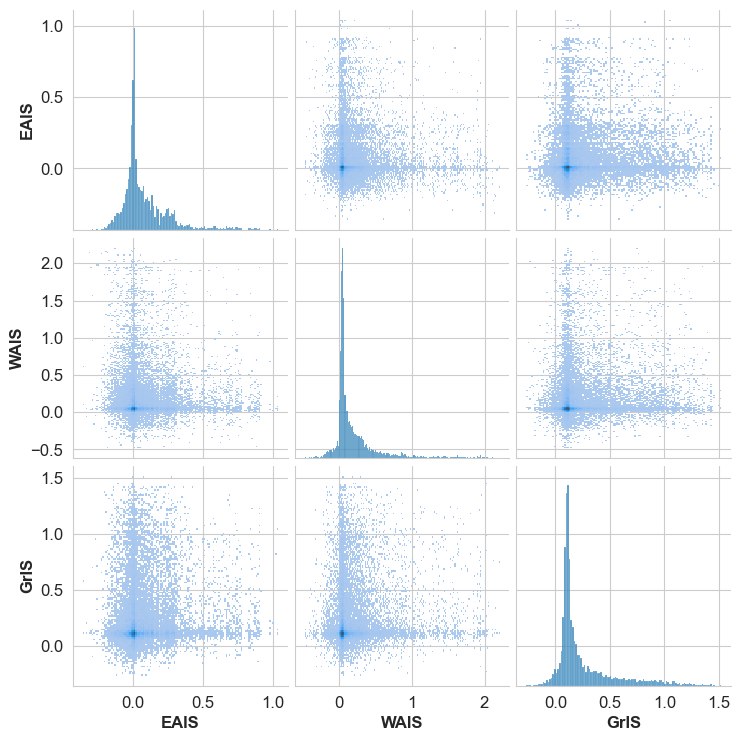

CPU times: user 1.36 s, sys: 15.6 ms, total: 1.38 s
Wall time: 1.38 s


,EAIS,WAIS,GrIS,TOT
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.081072,0.194541,0.252788,0.528400
std,0.175230,0.320184,0.276988,0.459151
min,-0.358987,-0.477153,-0.267998,-0.565139
25%,-0.011062,0.038000,0.097000,0.201598
50%,0.015000,0.068852,0.129000,0.397209
75%,0.134635,0.239899,0.302116,0.734410
max,1.039997,2.208514,1.521833,3.466545


In [15]:
%%time
trivariate_df = d23b.sample_trivariate_distribution(plot=True)
trivariate_df['TOT'] = trivariate_df.sum(axis=1)
trivariate_df.describe()

## Figures

CPU times: user 124 ms, sys: 7.56 ms, total: 132 ms
Wall time: 130 ms


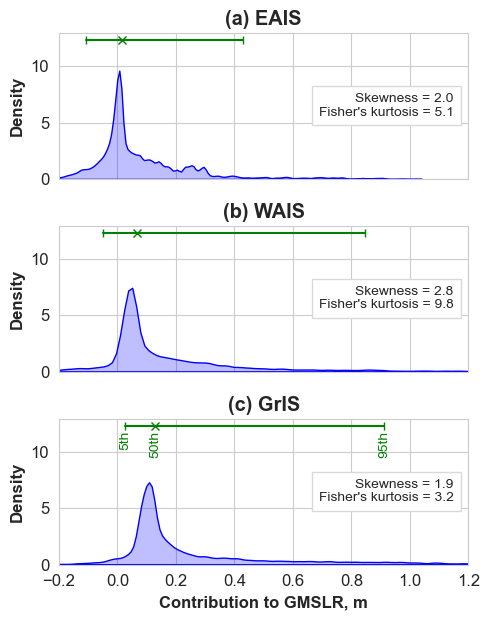

In [16]:
%%time
fig, axs = d23b.fig_component_marginals()

CPU times: user 42.6 ms, sys: 5.26 ms, total: 47.8 ms
Wall time: 44.2 ms


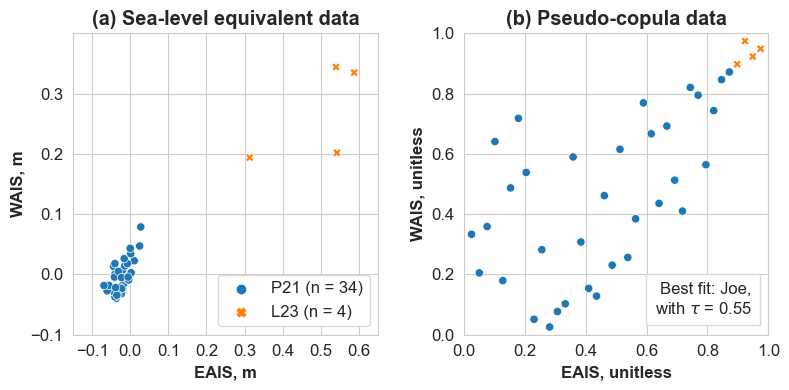

In [17]:
%%time
fig, axs = d23b.fig_ism_ensemble()

CPU times: user 15.5 s, sys: 103 ms, total: 15.6 s
Wall time: 16.3 s


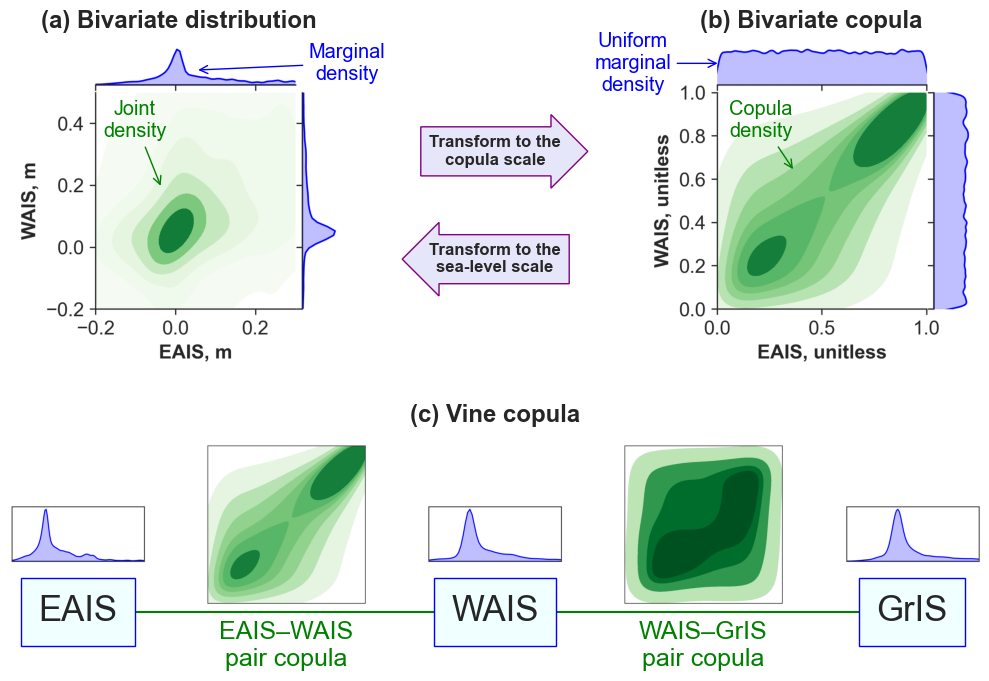

In [18]:
%%time
fig = d23b.fig_illustrate_copula()

CPU times: user 1.41 s, sys: 12 ms, total: 1.43 s
Wall time: 1.43 s


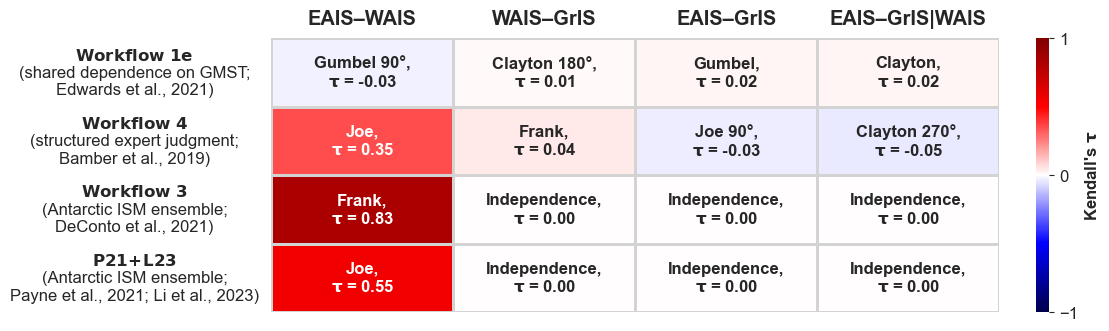

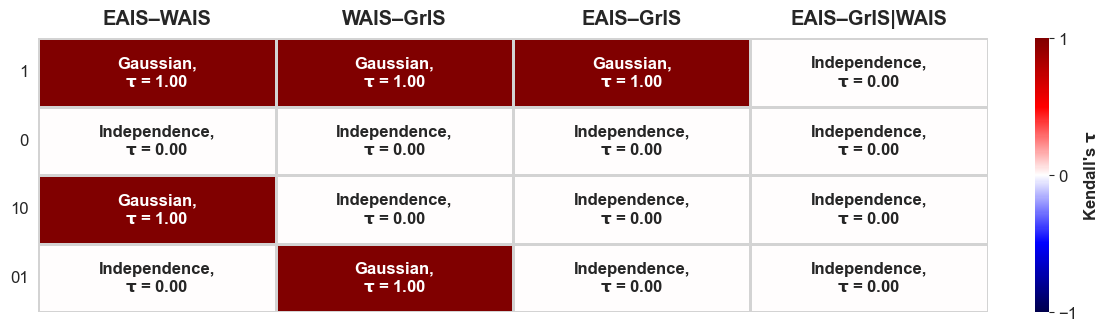

In [19]:
%%time
fig, axs = d23b.fig_dependence_table()
fig, axs = d23b.fig_dependence_table(cop_workflows=('1', '0', '10', '01'))

CPU times: user 10.5 s, sys: 59.7 ms, total: 10.6 s
Wall time: 11.1 s


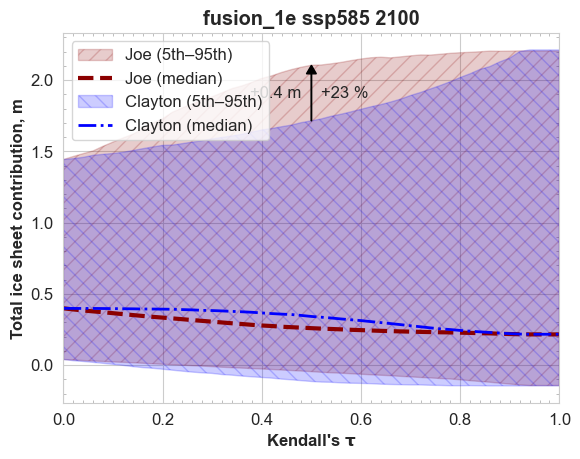

In [20]:
%%time
ax = d23b.ax_total_vs_tau()

CPU times: user 5.24 s, sys: 26.9 ms, total: 5.27 s
Wall time: 5.3 s


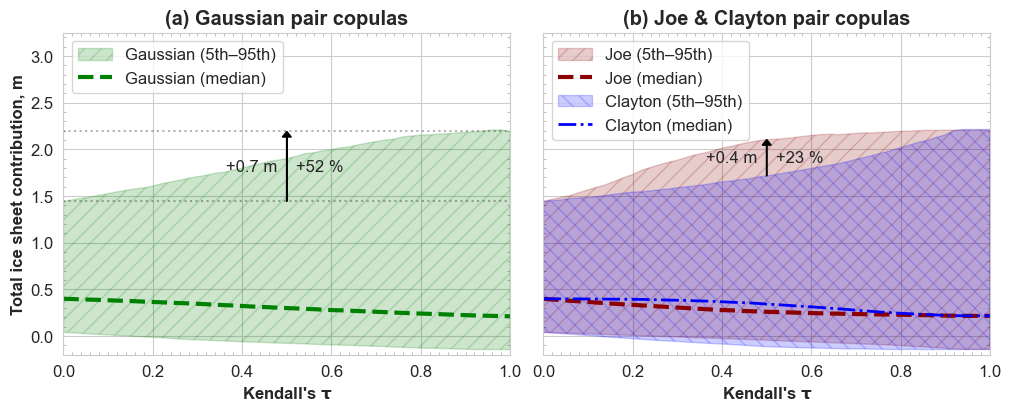

In [21]:
%%time
figs, axs = d23b.fig_total_vs_tau()

read_ar6_samples(wf_1e, WAIS, ssp585, 2020): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2030): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2040): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2050): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2060): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2070): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2080): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2090): including PEN in WAIS
('wf_3e', '0'), 95th: 1.6 - 1.4 = 0.2 m (+14 %)
('wf_3e', '0'), 50th: 0.4 - 0.4 = -0.0 m (-11 %)
CPU times: user 9.08 s, sys: 816 ms, total: 9.89 s
Wall time: 10.5 s


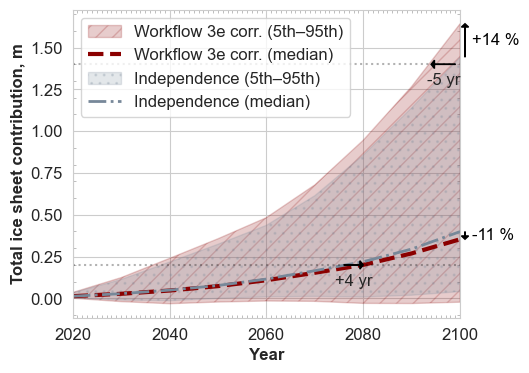

In [22]:
%%time
ax = d23b.ax_total_vs_time()

('1', '0'), 95th: 2.2 - 1.4 = 0.7 m (+52 %)
('1', '0'), 50th: 0.2 - 0.4 = -0.2 m (-47 %)
('10', '0'), 95th: 1.6 - 1.4 = 0.2 m (+14 %)
('10', '0'), 50th: 0.4 - 0.4 = -0.0 m (-12 %)
('01', '0'), 95th: 1.9 - 1.4 = 0.4 m (+28 %)
('01', '0'), 50th: 0.3 - 0.4 = -0.1 m (-21 %)
('1', '0'), 95th: 2.2 - 1.4 = 0.7 m (+52 %)
('1', '0'), 50th: 0.2 - 0.4 = -0.2 m (-47 %)
('10', '0'), 95th: 1.6 - 1.4 = 0.2 m (+14 %)
('10', '0'), 50th: 0.4 - 0.4 = -0.0 m (-12 %)
('wf_1e', '0'), 95th: 1.4 - 1.4 = 0.0 m (+0.4 %)
('wf_1e', '0'), 50th: 0.4 - 0.4 = -0.0 m (-1 %)
('wf_4', '10'), 95th: 1.6 - 1.6 = -0.1 m (-4 %)
('wf_4', '10'), 50th: 0.4 - 0.4 = 0.0 m (+2 %)
('wf_3e', '10'), 95th: 1.6 - 1.6 = -0.0 m (-0.3 %)
('wf_3e', '10'), 50th: 0.4 - 0.4 = 0.0 m (+0.4 %)
('P21+L23', '10'), 95th: 1.6 - 1.6 = -0.0 m (-2 %)
('P21+L23', '10'), 50th: 0.4 - 0.4 = -0.0 m (-0.3 %)
CPU times: user 5.37 s, sys: 21.7 ms, total: 5.39 s
Wall time: 5.38 s


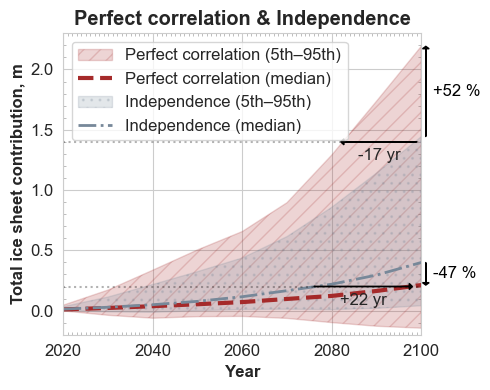

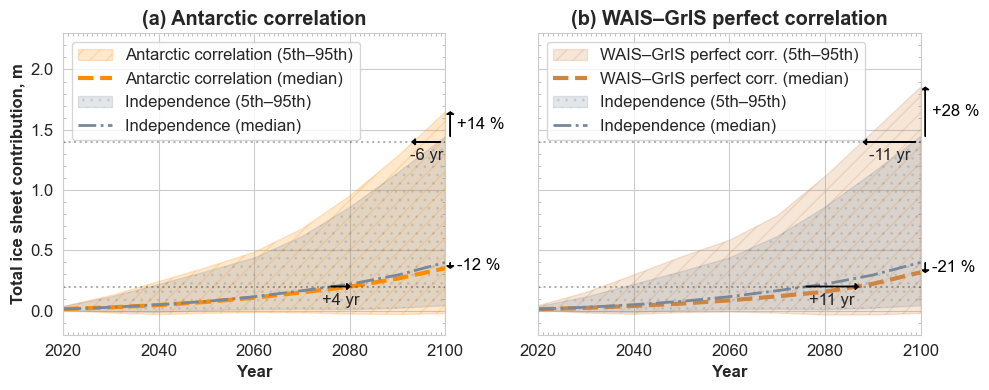

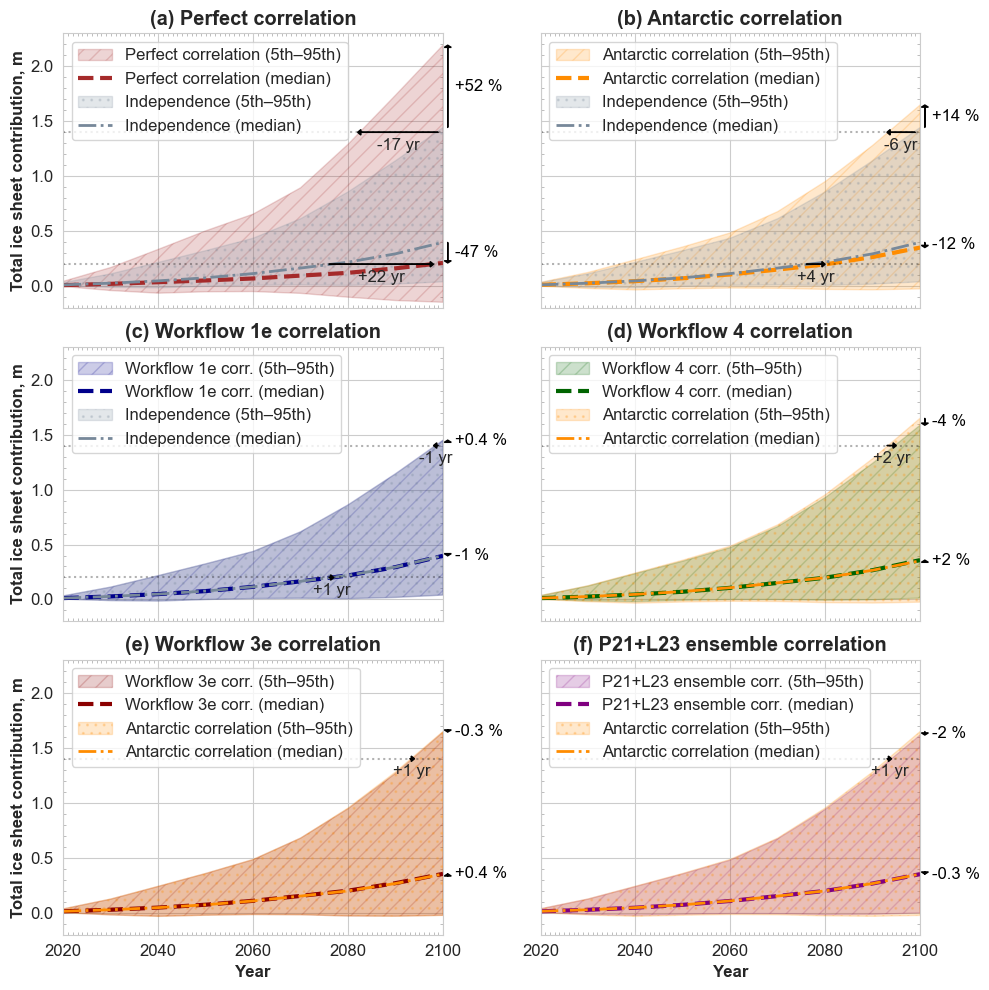

In [23]:
%%time
fig, axs = d23b.fig_total_vs_time(cop_workflows=('1',))
fig, axs = d23b.fig_total_vs_time(cop_workflows=('10', '01'))
fig, axs = d23b.fig_total_vs_time()

CPU times: user 202 ms, sys: 2.55 ms, total: 204 ms
Wall time: 203 ms


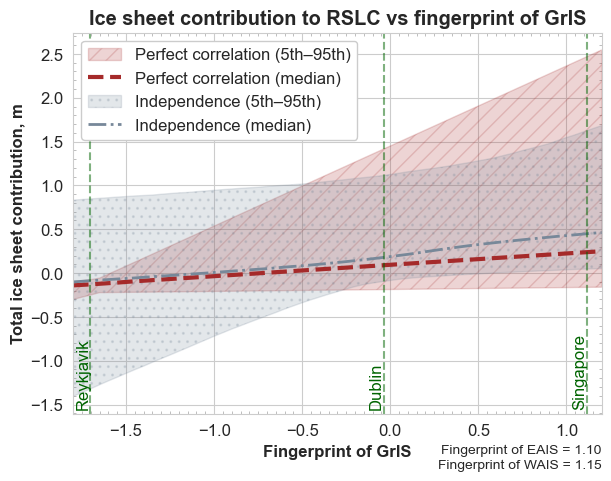

In [24]:
%%time
ax = d23b.ax_sum_vs_gris_fingerprint()

In [25]:
%%time
_ = d23b.name_save_fig(fig, fso='o')

Written o01.pdf (0.07 MB)
Written o01.png (0.96 MB)
CPU times: user 2 s, sys: 44.9 ms, total: 2.04 s
Wall time: 2.06 s


## Timing info

In [26]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2024-03-26 14:42:00
End:       2024-03-26 14:43:31
Wall time: 91 s
